In [1]:
import boto3
import requests
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import statistics
from sklearn.metrics.pairwise import cosine_similarity
import time 
import matplotlib.pyplot as plt
import seaborn as sns

def compute_sbert_similarity(text1, text2):
    embeddings = model.encode([text1, text2])
    return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

def calculate_descriptive_stats(scores):
    mean = statistics.mean(scores)  
    median = statistics.median(scores)  
    mode = statistics.mode(scores)  
    stdev = statistics.stdev(scores)  
    variance = statistics.variance(scores)  
    # Return descriptive statistics
    return {
        "mean": mean,
        "median": median,
        "mode": mode,
        "stdev": stdev,
        "variance": variance
    }

def get_outlier_count(data_values):
    data_values = np.array(data_values)  # Convert to NumPy array
    # Compute Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data_values, 25)
    Q3 = np.percentile(data_values, 75)
    # Compute Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = data_values[(data_values < lower_bound) | (data_values > upper_bound)]
    return len(outliers)

# Initialize Amazon Bedrock Runtime Client    
bedrock = boto3.client('bedrock-runtime', region_name='us-east-1')
# Initialize SBERT model to evaluate semantic similarity
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [2]:
# Create list of URLs for minutes
minutes=['https://www.federalreserve.gov/monetarypolicy/fomcminutes20180321.htm', 
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20180502.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20180613.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20180801.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20180926.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20181108.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20181219.htm', # End of 2018
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20190130.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20190320.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20190501.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20190619.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20190731.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20190918.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20191030.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20191211.htm', # End of 2019
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20200129.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20200315.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20200429.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20200610.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20200729.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20200916.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20201105.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20201216.htm', # End of 2020
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20210127.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20210317.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20210428.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20210616.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20210728.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20210922.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20211103.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20211215.htm', # End of 2021
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20220126.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20220316.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20220504.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20220615.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20220727.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20220921.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20221102.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20221214.htm', # End of 2022 
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20230201.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20230322.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20230503.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20230614.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20230726.htm', 
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20230920.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20231101.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20231213.htm', # End of 2023
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20240131.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20240320.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20240501.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20240612.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20240731.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20240918.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20241107.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20241218.htm', # End of 2024
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20250129.htm',
             'https://www.federalreserve.gov/monetarypolicy/fomcminutes20250319.htm'
         
]

# Create list of URLs for summaries 
summaries=['https://www.federalreserve.gov/newsevents/pressreleases/monetary20180321a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20180502a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20180613a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20180801a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20180926a.htm' ,
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20181108a.htm' ,
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20181219a.htm', # End of 2018
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190130a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190320a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190501a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190619a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190731a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190918a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20191030a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20191211a.htm', # End of 2019
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200129a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200315a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200429a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200610a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200729a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200916a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20201105a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20201216a.htm', # End of 2020
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210127a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210317a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210428a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210616a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210728a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210922a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20211103a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20211215a.htm', #End of 2021
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220126a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220316a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220504a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220615a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220727a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220921a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20221102a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20221214a.htm', # End of 2022
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230201a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230322a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230503a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230614a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230726a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230920a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20231101a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20221214a.htm', # End of 2023
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20240131a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20240320a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20240501a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20240612a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20240731a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20240918a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20241107a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20241218a.htm', # End of 2024
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20250129a.htm',
             'https://www.federalreserve.gov/newsevents/pressreleases/monetary20250319a.htm'
]



In [ ]:
# Create lists to store descriptive statistics for each iteration
means, medians, modes, stdevs, variances, outliers = [], [], [], [], [],[]

# Dictionary to persist prompts and summaries across iterations
mins_prompts = {}  
sums_summaries = {}  # Persist across i iterations

for i in range(25):  # Outer loop for robustness iterations
    # Create dictionaries for storing data in each iteration
    mins_messages = {}  
    mins_model_responses = {}
    mins_summaries = {}
    cosine_sims = {}
    for j in range(57):  # Inner loop for each FOMC meeting
        ## Extract Minutes from FOMC
        if i == 0:
            response = requests.get(minutes[j])
            soup = BeautifulSoup(response.text, "html.parser")
            text_content = soup.get_text()
            # Store prompt in dictionary for future iterations
            mins_prompts[j] = f"""You are an expert editor summarizing complex information.
            Rewrite the following text into a concise, 700-token abstractive summary.
            Focus on clarity, brevity, and essential insights while avoiding unnecessary details. 
            Do not include any information about dates (month/year) or whether the information is from minutes or summaries. 
            
            Text:
            {text_content}
            """
            # Prepare the message for Bedrock
            mins_messages[j] = [
                {"role": "user", "content": [{"text": mins_prompts[j]}]},
            ]
            # Extract Statements from FOMC and persist
            response = requests.get(summaries[j])
            soup = BeautifulSoup(response.text, "html.parser")
            sums_summaries[j] = soup.get_text()  # Persist across iterations
        else:
            # Use stored prompts from the first iteration
            mins_messages[j] = [
                {"role": "user", "content": [{"text": mins_prompts[j]}]},
            ]
        # Send the request to Bedrock and get the response
        mins_model_responses[j] = bedrock.converse(
            modelId='amazon.nova-micro-v1:0', 
            messages=mins_messages[j]
        )
        # Store the LLM response
        mins_summaries[j] = mins_model_responses[j]["output"]["message"]["content"][0]["text"]
        ## Compute similarity using SBERT
        sbert_score = compute_sbert_similarity(mins_summaries[j], sums_summaries[j])
        cosine_sims[j] = sbert_score
        # Introduce a 1 second delay after each request to avoid throttling
        time.sleep(1)
    # Compute descriptive statistics after all j iterations
    stats = calculate_descriptive_stats(list(cosine_sims.values()))
    # Append results to lists
    means.append(stats["mean"])
    medians.append(stats["median"])
    modes.append(stats["mode"])
    stdevs.append(stats["stdev"])
    variances.append(stats["variance"])
    outliers.append(get_outlier_count(list(cosine_sims.values())))

In [4]:
# Compute the mean of each metric across all iterations
final_results = {
    "mean_of_means": statistics.mean(means),
    "mean_of_medians": statistics.mean(medians),
    "mean_of_modes": statistics.mean(modes) if modes else None,
    "mean_of_stdevs": statistics.mean(stdevs),
    "mean_of_variances": statistics.mean(variances),
    "mean_of_outliers": statistics.mean(outliers)
}
# Print final results
final_results

{'mean_of_means': 0.57250804,
 'mean_of_medians': 0.5780769,
 'mean_of_modes': 0.5752976,
 'mean_of_stdevs': 0.04038927856196103,
 'mean_of_variances': 0.0016417296,
 'mean_of_outliers': 1.08}

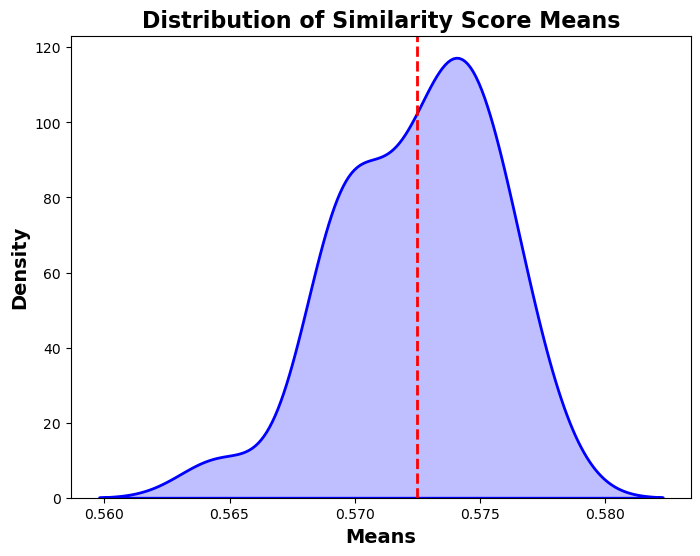

In [9]:
# Examine distribution of similarity scores
plt.figure(figsize=(8, 6))
sns.kdeplot(means, fill=True, color='blue', linewidth=2)
# Labels and title
plt.xlabel('Means',fontsize=14, fontweight='bold')
plt.ylabel('Density',fontsize=14, fontweight='bold')
plt.title('Distribution of Similarity Score Means',fontsize=16, fontweight='bold')
# Include lines to visualize mean and median values
plt.axvline(np.mean(means), color='red', linestyle='dashed', linewidth=2, label='Mean')
# Save the plot
plt.savefig('images/similarity_score_means_distribution.png')
# Show the plot
plt.show()
# Close the plot to avoid issues when creating new plots in the same session
plt.close()

In [10]:
means

[0.57188904,
 0.57449275,
 0.57284075,
 0.5707002,
 0.5695988,
 0.5775162,
 0.56927395,
 0.57261765,
 0.5645868,
 0.57543534,
 0.575011,
 0.573474,
 0.57507175,
 0.5732606,
 0.57501477,
 0.5692984,
 0.5694029,
 0.5740369,
 0.5695492,
 0.5761752,
 0.5764275,
 0.5742638,
 0.5731179,
 0.57063496,
 0.5690101]

In [11]:
outliers

[3, 0, 0, 0, 1, 2, 4, 1, 0, 1, 0, 0, 1, 3, 1, 0, 2, 2, 3, 0, 1, 0, 0, 2, 0]